0.973684210526
0.947368421053
1.0
Iteration                   Training Set Observations                   Testing set observations
    1     [ 4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] [0 1 2 3]:^25
    2     [ 0  1  2  3  8  9 10 11 12 13 14 15 16 17 18 19] [4 5 6 7]:^25
    3     [ 0  1  2  3  4  5  6  7 12 13 14 15 16 17 18 19] [ 8  9 10 11]:^25
    4     [ 0  1  2  3  4  5  6  7  8  9 10 11 16 17 18 19] [12 13 14 15]:^25
    5     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15] [16 17 18 19]:^25
[ 1.          0.93333333  1.          1.          0.86666667  0.93333333
  0.93333333  1.          1.          1.        ]
0.966666666667
[0.95999999999999996, 0.95333333333333337, 0.96666666666666656, 0.96666666666666656, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.9733333333

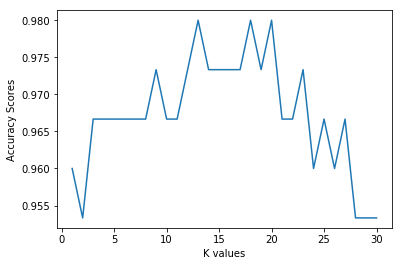

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score

#Drawbacks of Train-test split with knn classification model with iris dataset
iris = load_iris()
X = iris.data
y = iris.target

XTrain,XTest,yTrain,yTest = train_test_split(X,y,random_state=4)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(XTrain,yTrain)
yPredict = knn.predict(XTest)

#Accuracy with number of neighbors = 5
irisAccuracyN5 = metrics.accuracy_score(yTest,yPredict)
print(irisAccuracyN5)#accuracy = 0.973684210526

#Now changing random_state parameter to 3
XTrain,XTest,yTrain,yTest = train_test_split(X,y,random_state=3)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(XTrain,yTrain)
yPredict = knn.predict(XTest)

#Accuracy with number of neighbors = 5
irisAccuracyN5 = metrics.accuracy_score(yTest,yPredict)
print(irisAccuracyN5)#accuracy = 0.947368421053

#Now changing random_state parameter to 2
XTrain,XTest,yTrain,yTest = train_test_split(X,y,random_state=2)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(XTrain,yTrain)
yPredict = knn.predict(XTest)

#Accuracy with number of neighbors = 5
irisAccuracyN5 = metrics.accuracy_score(yTest,yPredict)
print(irisAccuracyN5)#accuracy = 1.0

#Defining K fold variable
kf = KFold(20,n_folds=5,shuffle=False)

#print content of each training and testing set
print("{} {:^61} {}".format('Iteration','Training Set Observations','Testing set observations'))
for iteration,data in enumerate(kf,start=1):
    print("{:^9} {} {}:^25".format(iteration,data[0],data[1]))

#Demonstrate how K fold classifier helps in choosing optimized n-neighbors for
#knn classifier
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn,X,y,cv=10,scoring='accuracy')
print(scores)#numpy Array

#Calculating mean Accuracy
print(scores.mean())

#Let search for valid Knn n_neighbors value in for which score.mean is maximum
kRange = range(1,31)
kScore = []
for K in kRange : 
    knn = KNeighborsClassifier(n_neighbors=K)
    scores = cross_val_score(knn,X,y,cv=10,scoring='accuracy')
    kScore.append(scores.mean())
    
print(kScore)
#Plottoing the Graph for kRange vs kScores 
plt.plot(kRange,kScore)
plt.xlabel("K values")
plt.ylabel("Accuracy Scores")
#From graph it is clear that Best accuracy is received at n = 9,18 and 20
#So we should choose 20 since bigger the parameter value simpler the model in case
#of KNeighborClassifier

#Comparison between different models using cross validation method
#models considered are KNeighborClassifier and LogisticRegression

#knn models with n = 5
knn = KNeighborsClassifier(n_neighbors=20)
scoresKNN = cross_val_score(knn,X,y,cv=10,scoring='accuracy')
print("KNN Score : ")
print(scoresKNN.mean())#Ans : 0.98

logreg = LogisticRegression()
scoresLR = cross_val_score(logreg,X,y,cv=10,scoring='accuracy')
print("Logistic Regression : ")#Ans : 0.953333333333
print(scoresLR.mean())

#cross validation also allows us to choose feature to be selected for prediction

data = pd.read_csv("C:\\Users\\sj141366\\jupyter notebook\\Scikit_Learn Kaggle Video Tutorial\\Advertising.csv",index_col = 0)

#List of features 
feature_cols = ['TV','Radio','Newspaper']

#Create Dataframe of Input Data and Output Data
X = data[feature_cols]
y = data.Sales

#Root mean squared value not available in scoring.So take mean_squared_error
#and Calculate square root.

linreg = LinearRegression()
scoreLinreg = cross_val_score(linreg,X,y,cv=10,scoring='neg_mean_squared_error')
meanScoreLinreg = -scoreLinreg
rootmeanScoreLinreg = np.sqrt(meanScoreLinreg)
print(rootmeanScoreLinreg.mean())#Ans = 1.69135317081

#removing Newspaper from feature_cols
feature_cols = ['TV','Radio']

#Create Dataframe of Input Data and Output Data
X = data[feature_cols]
y = data.Sales

#Root mean squared value not available in scoring.So take mean_squared_error
#and Calculate square root.

linreg = LinearRegression()
scoreLinreg = cross_val_score(linreg,X,y,cv=10,scoring='neg_mean_squared_error')
meanScoreLinreg = -scoreLinreg
rootmeanScoreLinreg = np.sqrt(meanScoreLinreg)
print(rootmeanScoreLinreg.mean())#Ans = 1.67967484191
#since model excluding newspaper gives better accuracy than with Newspaper 
#we can choose model which does not include Newspaper

